In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Ai-class/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data = data.drop(columns=['Outcome'])

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
# 입력과 타겟 분리
X = data.drop('Glucose', axis=1).values
y = data['Glucose'].values.astype(np.float32)

In [17]:
# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [27]:
# TensorDataset으로 래핑
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [33]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [35]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

In [37]:
# 회귀 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [41]:
# 학습 루프
model.train()
for epoch in range(30):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete.")

Epoch 1, Loss: 979.3417
Epoch 2, Loss: 1052.0409
Epoch 3, Loss: 975.4125
Epoch 4, Loss: 973.1829
Epoch 5, Loss: 946.4956
Epoch 6, Loss: 925.4020
Epoch 7, Loss: 986.8172
Epoch 8, Loss: 949.6721
Epoch 9, Loss: 944.2044
Epoch 10, Loss: 956.1148
Epoch 11, Loss: 890.4998
Epoch 12, Loss: 874.1629
Epoch 13, Loss: 917.6413
Epoch 14, Loss: 888.6020
Epoch 15, Loss: 869.8260
Epoch 16, Loss: 858.9414
Epoch 17, Loss: 855.2371
Epoch 18, Loss: 863.5534
Epoch 19, Loss: 858.9372
Epoch 20, Loss: 837.8132
Epoch 21, Loss: 847.9093
Epoch 22, Loss: 857.2019
Epoch 23, Loss: 841.9525
Epoch 24, Loss: 823.7168
Epoch 25, Loss: 862.0125
Epoch 26, Loss: 832.3053
Epoch 27, Loss: 838.9684
Epoch 28, Loss: 799.4510
Epoch 29, Loss: 797.2355
Epoch 30, Loss: 822.5411
Training complete.


In [43]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 849.8298


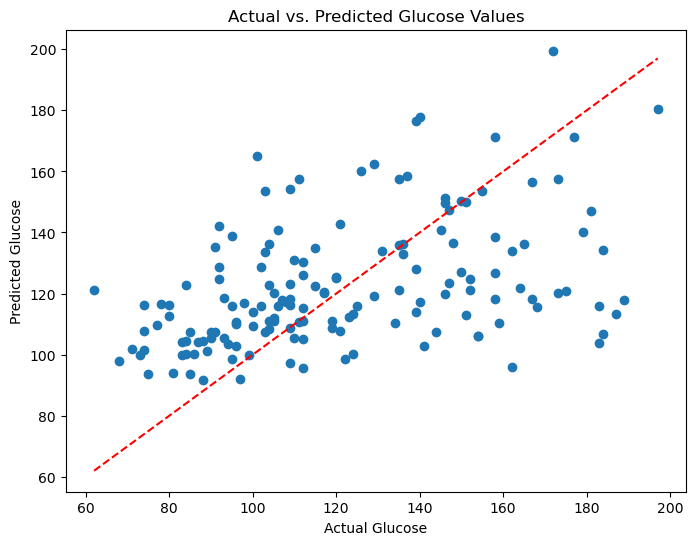

In [51]:
# 시각화 (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(actuals, preds)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs. Predicted Glucose Values")
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # y=x line
plt.show()